In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set()

data = pd.read_csv("AAPL.csv")

In [2]:
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-08-13,114.430000,116.042503,113.927498,115.010002,114.275002,210082000
1,2020-08-14,114.830002,115.000000,113.044998,114.907501,114.173164,165565200
2,2020-08-17,116.062500,116.087502,113.962502,114.607498,113.875069,119561600
3,2020-08-18,114.352501,116.000000,114.007500,115.562500,114.823975,105633600
4,2020-08-19,115.982498,117.162498,115.610001,115.707497,114.968048,145538000


In [3]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,127.229247,128.674197,125.631537,127.183383,126.709465,1.115111e+08
std,9.873117,9.762182,10.042149,9.966410,10.092503,4.875170e+07
min,104.540001,110.190002,103.099998,106.839996,106.157211,4.639770e+07
25%,120.034998,121.372499,118.525000,119.987499,119.604841,7.893885e+07
50%,126.515000,127.819999,125.091248,126.239998,125.864418,9.861765e+07
75%,133.777504,135.000000,131.987496,133.520001,133.109486,1.272202e+08
max,149.240005,150.000000,147.699997,149.149994,148.926865,3.459376e+08


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


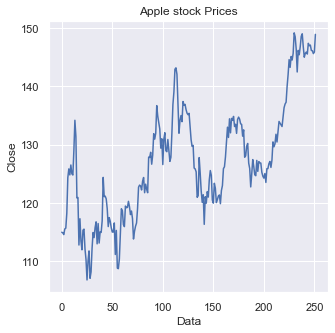

In [6]:
plt.figure (figsize = (5,5))
plt.plot(data["Close"])
plt.xlabel("Data")
plt.ylabel("Close")
plt.title("Apple stock Prices")
plt.show()

<AxesSubplot:>

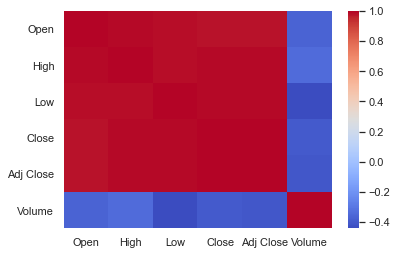

In [9]:
sns.heatmap(data.corr(), cmap = "coolwarm")

In [22]:
x = data[["Open", "High", "Low"]]
y = data["Close"]
x = x.to_numpy()
y = y.to_numpy()

y = y.reshape(-1,1)

In [23]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [29]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
data = pd.DataFrame(data = {"Prediction ": ypred})
print(data.head(10))

   Prediction 
0   134.179993
1   124.400002
2   137.389999
3   131.940002
4   142.020004
5   128.699997
6   124.970001
7   144.500000
8   126.269997
9   108.860001
